<a href="https://colab.research.google.com/github/amirabehery/AMIT/blob/main/Cifar10_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score
from keras.utils import to_categorical

# Importing Data & Splitting Data




In [2]:
# importing data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [3]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.3)

In [4]:
x_train.shape, x_valid.shape, y_train.shape, y_valid.shape, x_test.shape, y_test.shape

((35000, 32, 32, 3),
 (15000, 32, 32, 3),
 (35000, 1),
 (15000, 1),
 (10000, 32, 32, 3),
 (10000, 1))

# Image Augmentation

In [5]:
train_generator = ImageDataGenerator(rotation_range=2, horizontal_flip=True, zoom_range=0.1)
val_generator = ImageDataGenerator(rotation_range=2, horizontal_flip=True, zoom_range=0.1)
test_generator = ImageDataGenerator(rotation_range=2, horizontal_flip=True, zoom_range=0.1)

train_generator.fit(x_train)
val_generator.fit(x_valid)
test_generator.fit(x_test)

xtrain_generator = train_generator.flow(x_train, y_train)
xval_generator = val_generator.flow(x_valid, y_valid)
xtest_generator = test_generator.flow(x_test, y_test)

# Building Alex Model

In [6]:
alexNet = Sequential()

# 1st layer
alexNet.add(Conv2D(filters = 96, input_shape=(32,32,3), kernel_size=(11,11), strides=(4,4), padding='same', activation='relu'))
alexNet.add(BatchNormalization())
alexNet.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'))

# 2nd layer
alexNet.add(Conv2D(filters = 256, kernel_size=(5,5), strides=(1,1), padding='same', activation='relu'))
alexNet.add(BatchNormalization())
alexNet.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'))

# 3th layer
alexNet.add(Conv2D(filters = 384, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
alexNet.add(BatchNormalization())

# 4th layer
alexNet.add(Conv2D(filters = 384, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
alexNet.add(BatchNormalization())

# 5th layer
alexNet.add(Conv2D(filters = 256, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
alexNet.add(BatchNormalization())
alexNet.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'))

# flatten
alexNet.add(Flatten())

# Start Fully Connected Layer =====> 6th layer
alexNet.add(Dense(4096, activation='relu'))

# 1st dropout 
alexNet.add(Dropout(rate=0.5))

# 2nd Fully Connected Layer =====> 7th layer
alexNet.add(Dense(4096, activation='relu'))

# 2nd dropout 
alexNet.add(Dropout(rate=0.5))

# 3nd Fully Connected Layer =====> 8th layer
alexNet.add(Dense(4096, activation='relu'))

# output layer =====> 8th layer
alexNet.add(Dense(10, activation='softmax'))

In [7]:
alexNet.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
alexNet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 8, 8, 96)          34944     
                                                                 
 batch_normalization (BatchN  (None, 8, 8, 96)         384       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 4, 4, 96)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 4, 4, 256)         614656    
                                                                 
 batch_normalization_1 (Batc  (None, 4, 4, 256)        1024      
 hNormalization)                                                 
                                                        

In [8]:
alex_history = alexNet.fit(xtrain_generator, epochs=10, validation_data=xval_generator, verbose=1)

Epoch 1/10
1094/1094 [==============================] - 60s 42ms/step - loss: 1.9299 - accuracy: 0.1012 - val_loss: 1.8215 - val_accuracy: 0.2142
Epoch 2/10
1094/1094 [==============================] - 37s 34ms/step - loss: 1.6834 - accuracy: 0.1041 - val_loss: 1.6730 - val_accuracy: 0.0963
Epoch 3/10
1094/1094 [==============================] - 38s 34ms/step - loss: 1.5776 - accuracy: 0.1107 - val_loss: 1.6071 - val_accuracy: 0.0505
Epoch 4/10
1094/1094 [==============================] - 37s 34ms/step - loss: 1.4943 - accuracy: 0.1118 - val_loss: 1.6407 - val_accuracy: 0.1096
Epoch 5/10
1094/1094 [==============================] - 38s 35ms/step - loss: 1.4420 - accuracy: 0.1071 - val_loss: 1.5691 - val_accuracy: 0.1359
Epoch 6/10
1094/1094 [==============================] - 36s 33ms/step - loss: 1.3713 - accuracy: 0.1070 - val_loss: 1.3505 - val_accuracy: 0.0785
Epoch 7/10
1094/1094 [==============================] - 38s 35ms/step - loss: 1.3175 - accuracy: 0.1061 - val_loss: 1.3709 -

In [9]:
evaluation = alexNet.evaluate(x_test, y_test)
print(f'Test Accuracy: {evaluation[1]}')

313/313 [==============================] - 3s 8ms/step - loss: 1.3001 - accuracy: 0.0706
Test Accuracy: 0.0706000030040741


<AxesSubplot:>

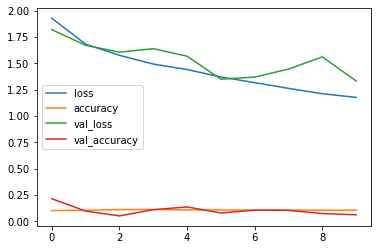

In [10]:
pd.DataFrame(alex_history.history).plot()

In [11]:
y_pred = alexNet.predict(x_test)

313/313 [==============================] - 1s 4ms/step


In [12]:
def transform_predictions(list1):
  result = []
  for i in range(len(list1)):
    max_ = np.argmax(list1[i])
    result.append(max_)
  return result

In [13]:
y_pred_transformed = transform_predictions(y_pred)

In [14]:
accuracy_score(y_pred_transformed, y_test)

0.5544

AlexNet Accuracy was very bad
# New 5 Model CNN
New Model Generators to increase accuracy

In [15]:
# Normalizing
x_train=x_train/255
x_valid=x_valid/255
x_test=x_test/255

#One hot encoding
y_train=to_categorical(y_train,10)
y_valid=to_categorical(y_valid,10)
y_test=to_categorical(y_test,10)

In [16]:
model1=Sequential()
model1.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Flatten())
model1.add(Dense(256,activation='relu'))
model1.add(Dense(10,activation='softmax'))
model1.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [17]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 800)               0         
                                                                 
 dense_4 (Dense)             (None, 256)              

In [18]:
history1=model1.fit(x_train,y_train,epochs=20,validation_data=(x_test,y_test))

Epoch 1/20
1094/1094 [==============================] - 9s 7ms/step - loss: 1.5665 - accuracy: 0.4285 - val_loss: 1.3322 - val_accuracy: 0.5215
Epoch 2/20
1094/1094 [==============================] - 6s 6ms/step - loss: 1.2520 - accuracy: 0.5549 - val_loss: 1.2435 - val_accuracy: 0.5630
Epoch 3/20
1094/1094 [==============================] - 7s 6ms/step - loss: 1.1160 - accuracy: 0.6068 - val_loss: 1.1538 - val_accuracy: 0.5912
Epoch 4/20
1094/1094 [==============================] - 6s 5ms/step - loss: 1.0161 - accuracy: 0.6413 - val_loss: 1.0854 - val_accuracy: 0.6208
Epoch 5/20
1094/1094 [==============================] - 7s 6ms/step - loss: 0.9187 - accuracy: 0.6792 - val_loss: 1.0550 - val_accuracy: 0.6347
Epoch 6/20
1094/1094 [==============================] - 6s 6ms/step - loss: 0.8503 - accuracy: 0.7036 - val_loss: 1.0344 - val_accuracy: 0.6448
Epoch 7/20
1094/1094 [==============================] - 11s 10ms/step - loss: 0.7712 - accuracy: 0.7297 - val_loss: 1.0523 - val_accurac

In [19]:
evaluation = model1.evaluate(x_test, y_test)
print(f'Test Accuracy: {evaluation[1]}')

313/313 [==============================] - 1s 4ms/step - loss: 2.1026 - accuracy: 0.6255
Test Accuracy: 0.6255000233650208


<AxesSubplot:>

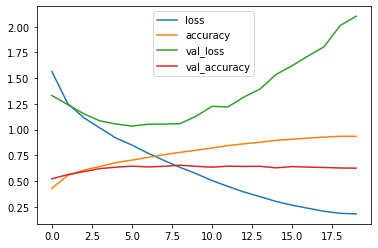

In [20]:
pd.DataFrame(history1.history).plot()

In [21]:
model2=Sequential()
model2.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.25))
model2.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.25))
model2.add(Flatten())
model2.add(Dense(256,activation='relu'))
model2.add(Dense(10,activation='softmax'))
model2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history2=model2.fit(x_train,y_train,epochs=20,validation_data=(x_valid,y_valid))

Epoch 1/20
1094/1094 [==============================] - 9s 7ms/step - loss: 1.6307 - accuracy: 0.4042 - val_loss: 1.3884 - val_accuracy: 0.5105
Epoch 2/20
1094/1094 [==============================] - 8s 7ms/step - loss: 1.3354 - accuracy: 0.5229 - val_loss: 1.2333 - val_accuracy: 0.5678
Epoch 3/20
1094/1094 [==============================] - 6s 6ms/step - loss: 1.2045 - accuracy: 0.5737 - val_loss: 1.1264 - val_accuracy: 0.6019
Epoch 4/20
1094/1094 [==============================] - 7s 7ms/step - loss: 1.1202 - accuracy: 0.6047 - val_loss: 1.0739 - val_accuracy: 0.6173
Epoch 5/20
1094/1094 [==============================] - 6s 6ms/step - loss: 1.0439 - accuracy: 0.6323 - val_loss: 1.0106 - val_accuracy: 0.6457
Epoch 6/20
1094/1094 [==============================] - 8s 7ms/step - loss: 0.9754 - accuracy: 0.6572 - val_loss: 0.9843 - val_accuracy: 0.6563
Epoch 7/20
1094/1094 [==============================] - 6s 6ms/step - loss: 0.9145 - accuracy: 0.6809 - val_loss: 0.9547 - val_accuracy:

In [22]:
evaluation = model2.evaluate(x_test, y_test)
print(f'Test Accuracy: {evaluation[1]}')

313/313 [==============================] - 1s 3ms/step - loss: 0.9796 - accuracy: 0.6884
Test Accuracy: 0.6883999705314636


<AxesSubplot:>

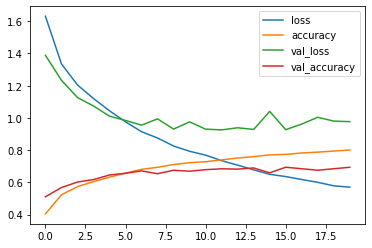

In [23]:
pd.DataFrame(history2.history).plot()

In [24]:
model3 = Sequential()
model3.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', input_shape = (32,32,3)))
model3.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
model3.add(MaxPooling2D(2,2))
model3.add(Dropout(0.4))


model3.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
model3.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
model3.add(MaxPooling2D(2,2))
model3.add(Dropout(0.4))

model3.add(Flatten())

model3.add(Dense(units = 1024, activation = 'relu'))

model3.add(Dense(units = 1024, activation = 'relu'))

model3.add(Dense(units = 10, activation = 'softmax'))
model3.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
history3=model3.fit(x_train,y_train,epochs=50,validation_data=(x_test,y_test))

Epoch 1/50
1094/1094 [==============================] - 16s 11ms/step - loss: 1.6093 - accuracy: 0.4052 - val_loss: 1.2576 - val_accuracy: 0.5444
Epoch 2/50
1094/1094 [==============================] - 10s 9ms/step - loss: 1.2362 - accuracy: 0.5552 - val_loss: 1.1138 - val_accuracy: 0.6012
Epoch 3/50
1094/1094 [==============================] - 11s 10ms/step - loss: 1.0759 - accuracy: 0.6201 - val_loss: 0.9996 - val_accuracy: 0.6453
Epoch 4/50
1094/1094 [==============================] - 11s 10ms/step - loss: 0.9532 - accuracy: 0.6615 - val_loss: 0.8966 - val_accuracy: 0.6812
Epoch 5/50
1094/1094 [==============================] - 10s 9ms/step - loss: 0.8690 - accuracy: 0.6931 - val_loss: 0.9427 - val_accuracy: 0.6667
Epoch 6/50
1094/1094 [==============================] - 12s 11ms/step - loss: 0.7929 - accuracy: 0.7237 - val_loss: 0.8081 - val_accuracy: 0.7209
Epoch 7/50
1094/1094 [==============================] - 10s 10ms/step - loss: 0.7238 - accuracy: 0.7416 - val_loss: 0.8208 - v

<AxesSubplot:>

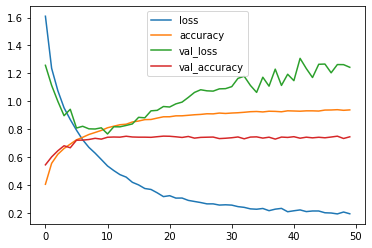

In [25]:
pd.DataFrame(history3.history).plot()

In [26]:
model4 = Sequential()
model4.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model4.add(BatchNormalization())
model4.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model4.add(BatchNormalization())
model4.add(MaxPooling2D((2, 2)))
model4.add(Dropout(0.2))
model4.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model4.add(BatchNormalization())
model4.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model4.add(BatchNormalization())
model4.add(MaxPooling2D((2, 2)))
model4.add(Dropout(0.3))
model4.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model4.add(BatchNormalization())
model4.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model4.add(BatchNormalization())
model4.add(MaxPooling2D((2, 2)))
model4.add(Dropout(0.4))
model4.add(Flatten())
model4.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model4.add(BatchNormalization())
model4.add(Dropout(0.5))
model4.add(Dense(10, activation='softmax'))
model4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True,rotation_range=20)
it_train = generator.flow(x_train,y_train)
steps = int(x_train.shape[0] / 64)
history4 = model4.fit_generator(it_train,epochs=50,steps_per_epoch=steps,validation_data=(x_test,y_test))

Epoch 1/50


<ipython-input-26-d8940115472c>:29: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history4 = model4.fit_generator(it_train,epochs=50,steps_per_epoch=steps,validation_data=(x_test,y_test))


546/546 [==============================] - 23s 31ms/step - loss: 2.0811 - accuracy: 0.3038 - val_loss: 1.5171 - val_accuracy: 0.4370
Epoch 2/50
546/546 [==============================] - 16s 29ms/step - loss: 1.5965 - accuracy: 0.4220 - val_loss: 1.3551 - val_accuracy: 0.5110
Epoch 3/50
546/546 [==============================] - 15s 28ms/step - loss: 1.4481 - accuracy: 0.4842 - val_loss: 1.2597 - val_accuracy: 0.5429
Epoch 4/50
546/546 [==============================] - 16s 29ms/step - loss: 1.3453 - accuracy: 0.5193 - val_loss: 1.4914 - val_accuracy: 0.5026
Epoch 5/50
546/546 [==============================] - 16s 29ms/step - loss: 1.2776 - accuracy: 0.5448 - val_loss: 1.1673 - val_accuracy: 0.5971
Epoch 6/50
546/546 [==============================] - 16s 30ms/step - loss: 1.1859 - accuracy: 0.5786 - val_loss: 1.1308 - val_accuracy: 0.6031
Epoch 7/50
546/546 [==============================] - 16s 29ms/step - loss: 1.1288 - accuracy: 0.6027 - val_loss: 1.0874 - val_accuracy: 0.6224
Epo

<AxesSubplot:>

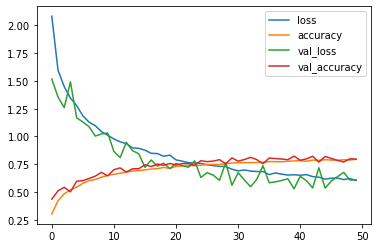

In [27]:
pd.DataFrame(history4.history).plot()

In [28]:
cifar_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [32]:
np.argmax(y_test[0])

3

In [36]:
def checkModel(image_number, model,labels):
  # display the image
  plt.imshow(x_test[image_number])
  
  # load the image in an array
  n = np.array(x_test[image_number])
  
  # reshape it
  p = n.reshape(1, 32, 32, 3)
  
  # pass in the network for prediction and
  # save the predicted label
  predicted_label = labels[model.predict(p).argmax()]
  
  # load the original label
  original_label = labels[np.argmax(y_test[image_number])]
  
  # display the result
  print(f"Original label is {original_label}")
  print(f"predicted label is {predicted_label}")

1/1 [==============================] - 0s 29ms/step
Original label is cat
predicted label is cat


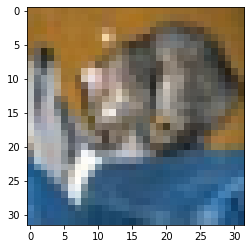

In [37]:
checkModel(0, model4,cifar_classes)

1/1 [==============================] - 0s 28ms/step
Original label is deer
predicted label is deer


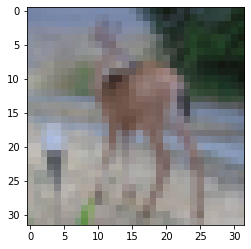

In [38]:
checkModel(100, model4,cifar_classes)

1/1 [==============================] - 0s 30ms/step
Original label is ship
predicted label is ship


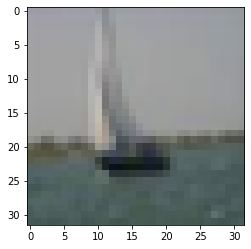

In [39]:
checkModel(55, model4,cifar_classes)

1/1 [==============================] - 0s 26ms/step
Original label is horse
predicted label is horse


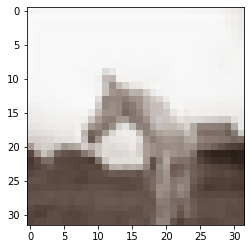

In [40]:
checkModel(87, model4,cifar_classes)

1/1 [==============================] - 0s 78ms/step
Original label is dog
predicted label is dog


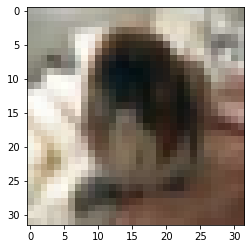

In [41]:
checkModel(200, model4,cifar_classes)